In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h5>The saying ‘Sell in May and go away, but remember to come back in September’ is a well-known financial proverb. It suggests that the market’s performance is typically weaker in the six-month period between May and October. To test the validity of this maxim, I analyzed the price data of IVV.US (iShares Core S&P 500 ETF) from 2000 to 2024. This ETF closely tracks the investment results of the S&P 500 index, composed of large-capitalization U.S. equities.</h5>

In [2]:
df = pd.read_csv(r".\IVV_US.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-05-19,142.65625,142.65625,140.25000,140.68750,90.888168,775500
1,2000-05-22,140.59375,140.59375,136.81250,139.81250,90.322899,1850600
2,2000-05-23,140.21875,140.21875,137.68750,137.68750,88.950073,373900
3,2000-05-24,137.75000,140.06250,136.65625,139.75000,90.282478,400300
4,2000-05-25,140.03125,140.93750,137.87500,138.46875,89.454781,69600


<h3><i> * Checking data types -- </i> </h3>

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<h3><i> * Formating date -- </i> </h3>

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

<h3><i> * Creating new dataframe with date as index -- </i> </h3>

In [7]:
newDf = df.set_index("Date")
newDf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-05-19,142.65625,142.65625,140.25000,140.68750,90.888168,775500
2000-05-22,140.59375,140.59375,136.81250,139.81250,90.322899,1850600
2000-05-23,140.21875,140.21875,137.68750,137.68750,88.950073,373900
2000-05-24,137.75000,140.06250,136.65625,139.75000,90.282478,400300
2000-05-25,140.03125,140.93750,137.87500,138.46875,89.454781,69600


In [8]:
#checking how many years the this dataframe has
pd.unique(newDf.index.year)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

<h3><i> * Checking how many rows of data (days) for each year -- </i> </h3>

In [9]:
for i in pd.unique(newDf.index.year):
    print("Year " + str(i) + " Number of Rows " + str(len(newDf.loc[str(i)])))

Year 2000 Number of Rows 156
Year 2001 Number of Rows 248
Year 2002 Number of Rows 252
Year 2003 Number of Rows 252
Year 2004 Number of Rows 252
Year 2005 Number of Rows 252
Year 2006 Number of Rows 251
Year 2007 Number of Rows 251
Year 2008 Number of Rows 253
Year 2009 Number of Rows 252
Year 2010 Number of Rows 252
Year 2011 Number of Rows 252
Year 2012 Number of Rows 250
Year 2013 Number of Rows 252
Year 2014 Number of Rows 252
Year 2015 Number of Rows 252
Year 2016 Number of Rows 252
Year 2017 Number of Rows 251
Year 2018 Number of Rows 251
Year 2019 Number of Rows 252
Year 2020 Number of Rows 253
Year 2021 Number of Rows 252
Year 2022 Number of Rows 251
Year 2023 Number of Rows 250
Year 2024 Number of Rows 111


<h3><i> * Find out the lowest price and date for each year -- </i> </h3>

In [10]:
# adding year column to df:
df['year'] = df['Date'].dt.year

# Group the DataFrame by 'year', find the index of the minimum 'Close' value in each group
min_close_indices = df.groupby('year')['Close'].idxmin()

# Use the indices to get the corresponding rows from the original DataFrame
lowprice_df_extracted = df.loc[min_close_indices]

lowprice_df_extracted['month'] = lowprice_df_extracted.Date.dt.month

lowprice_df_extracted['month_name'] = pd.to_datetime(lowprice_df_extracted['month'], format='%m').dt.month_name()

lowprice_df_extracted.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,month_name
149,2000-12-20,128.312500,128.640625,126.281250,126.312500,82.083908,369500,2000,12,December
334,2001-09-21,95.250000,99.199997,94.250000,97.250000,63.498116,206200,2001,9,September
598,2002-10-09,79.000000,80.279999,77.790001,78.139999,51.915051,255300,2002,10,October
702,2003-03-11,81.220001,81.610001,80.199997,80.250000,53.786472,235200,2003,3,March
1057,2004-08-06,107.669998,107.930000,106.690002,106.949997,73.367317,498500,2004,8,August


<h3><i> * get the frequency of the months in which IVV was the lowest in that year for the past 24 years -- </i> </h3>

In [11]:
## get the frequency of the months in which IVV was the lowest in that year for the past 24 years
lowprice_df_extracted_freq = lowprice_df_extracted.month_name.value_counts().reset_index()
lowprice_df_extracted_freq.columns = ['month', 'count']
lowprice_df_extracted_freq

,month,count
0,January,7
1,March,4
2,October,3
3,December,2
4,August,2
5,February,2
6,September,1
7,April,1
8,June,1
9,November,1


<h2><i> * Plot the charts for Time Series Trend Over 24 years since Year 2000 -- </i> </h2>

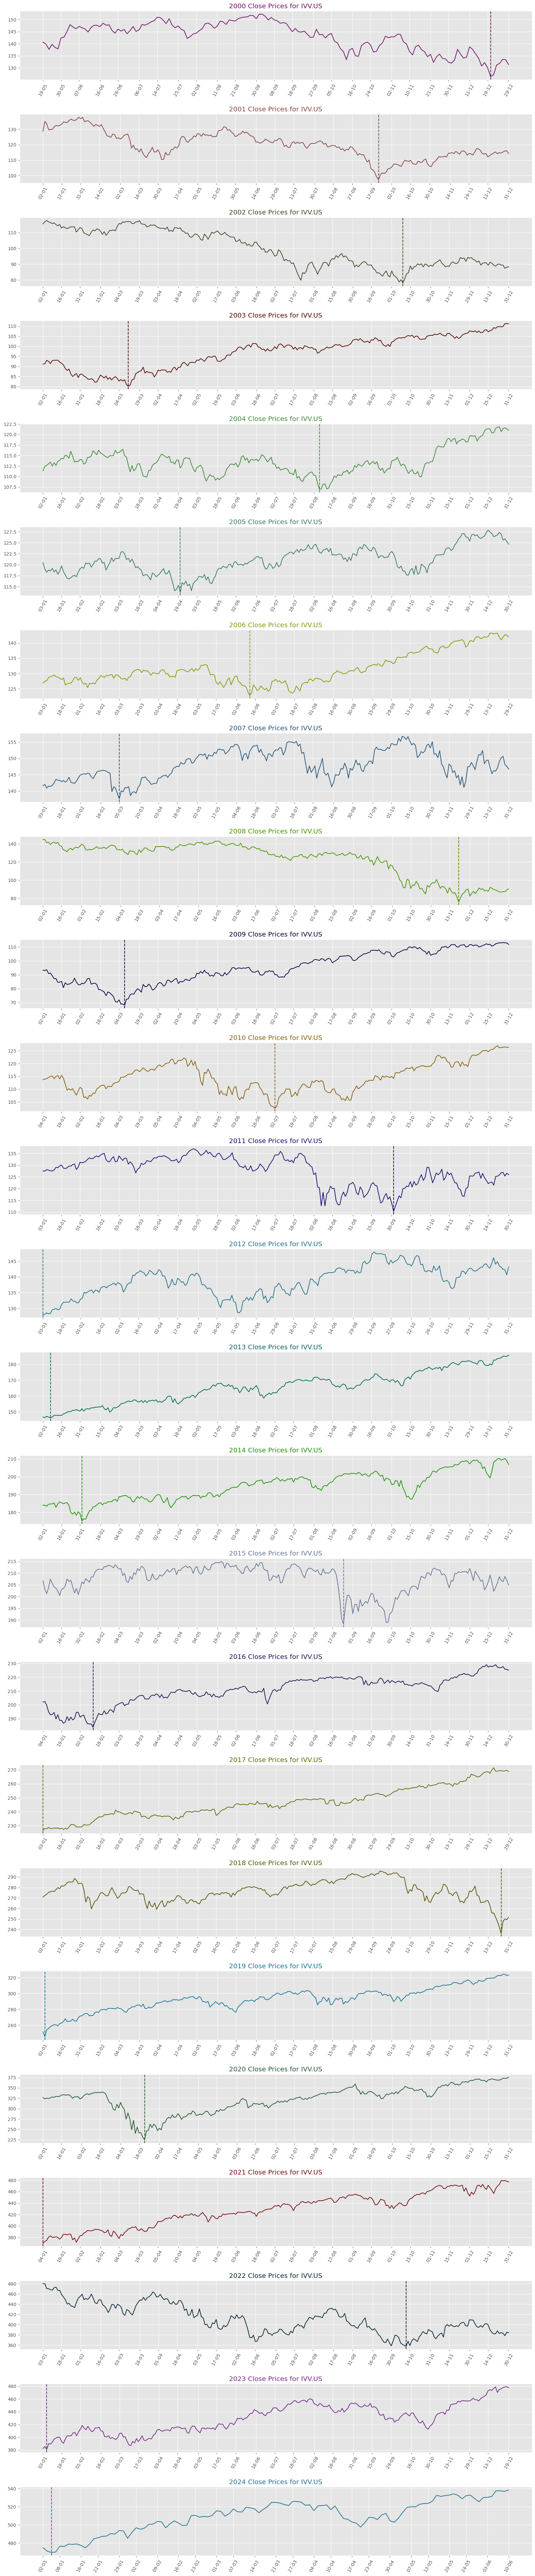

In [12]:
import random
plt.style.use("ggplot")
num_labels = 25  # Adjust this value to control the number of labels
num_of_years = np.unique(newDf.index.year)

fig, ax=plt.subplots(len(num_of_years), 1, figsize=(20, 100))

for i in range(0, len(num_of_years)):
    year = str(num_of_years[i])
    x_axis= np.arange(len(newDf.loc[year].index))
    label_indices = np.linspace(0, len(x_axis)-1, num_labels, dtype=int)
    
    random_color = "#" + ''.join([random.choice('0123456789') for _ in range(6)])
    ax[i].plot(newDf.loc[year].index.strftime('%m-%d'), newDf.loc[year].Close, color=random_color, label= year)

    # Find the lowest point
    min_close = newDf.loc[year].Close.min()
    min_date = newDf.loc[year][newDf.loc[year].Close == min_close].index.strftime('%m-%d')[0]

    # Add a vertical line at the lowest point
    ax[i].axvline(x=min_date, color=random_color, linestyle='--')

    
    ax[i].set_xticks(x_axis[label_indices])
    ax[i].set_xticklabels([newDf.loc[year].index.strftime('%d-%m')[i] for i in label_indices], rotation=60)
    ax[i].set_title(year + ' Close Prices for IVV.US', color=random_color)  # Add subtitle for the first chart


plt.subplots_adjust(hspace=0.5)  # Increase the spacing between the subplots
#plt.savefig('timeserise_ivv_us.png')
plt.show()

<h2> Extract the Close prices for each year</h2>
<h5> Note: "Sell in May, buy back in September" implies initially purchasing stocks in the current year and then selling them in May of the following year.</h5>

<h5>To implement this strategy, we need to:</h5>

<h5>Extract the closing prices for the mid-day of September for the years 2021 to 2023.
Extract the closing prices for the mid-day of January, February, March, April, May, June, July, and August for the subsequent years 2022 to 2024.</h5>


In [13]:
def extract_mid_month_data(df, month, column_data):
    # extract the unique years from the df (df's index is DateTime)
    years = df.index.year.unique()
    # mid dates (15th) in the given month in each year
    mid_dates_in_month = pd.to_datetime([f'{year}-{month:02d}-15' for year in years])
    # extract the avaiable dates in given month from this dataframe as not every year has the required data for 15th that month.
    avaibale_dates_in_month = [df.index.asof(date) for date in mid_dates_in_month]
    # extract all data on the mid that month (if 15th is no avaiable, then any previous date will be fetched instead)
    return pd.concat([df.asof(date) for date in avaibale_dates_in_month], axis=1).T[column_data].to_frame()

In [14]:
# Example the prices for mid of September for each year: 
df_price_in_mid_sep = extract_mid_month_data(newDf, 9, 'Close')


In [15]:
# Get the price in the middle of following Months (Jan to Aug) for each year from 2001 to 2024:

list_months = [1,2,3,4,5,6,7,8]   # extract months from Jan to Aug;
collection_of_months = [[] for i in range(len(list_months))]

for i in range(len(list_months)):
    collection_of_months[i] = extract_mid_month_data(newDf, list_months[i], 'Close').values

# Convert each array to a pandas DataFrame and concatenate them
price_extracted_month_from_y2001 = pd.concat([pd.DataFrame(arr) for arr in collection_of_months], axis=1)

# Optionally, rename the columns
price_extracted_month_from_y2001.columns = ['mid_jan_price', 'mid_feb_price', 'mid_mar_price', 'mid_apr_price',
             'mid_may_price', 'mid_jun_price', 'mid_jul_price', 'mid_aug_price'] 

years = np.arange(2000, 2000 + (len(price_extracted_month_from_y2001)))
price_extracted_month_from_y2001['year'] = years
price_extracted_month_from_y2001 = price_extracted_month_from_y2001.shift(-1)  # remove the first invalid row 

# rearrange the columns so let the year in the start:
price_extracted_month_from_y2001 = price_extracted_month_from_y2001[['year', 'mid_jan_price', 'mid_feb_price', 'mid_mar_price', 'mid_apr_price', 
         'mid_may_price', 'mid_jun_price', 'mid_jul_price', 'mid_aug_price']]

In [16]:
price_extracted_month_from_y2001

,year,mid_jan_price,mid_feb_price,mid_mar_price,mid_apr_price,mid_may_price,mid_jun_price,mid_jul_price,mid_aug_price
0,2001.0,132.125000,133.000000,117.400002,118.570000,125.320000,121.839996,122.000000,118.160004
1,2002.0,115.099998,110.790001,116.720001,110.650002,109.480003,101.470001,92.190002,93.570000
2,2003.0,92.169998,84.019997,83.650002,89.680000,95.160004,99.580002,100.510002,99.550003
3,2004.0,113.820000,115.180000,111.339996,112.959999,110.070000,114.050003,110.750000,107.260002
4,2005.0,118.470001,121.360001,120.330002,114.070000,115.669998,120.980003,122.860001,123.699997
5,2006.0,128.800003,128.330002,130.919998,129.009995,129.759995,126.269997,123.800003,128.880005
6,2007.0,143.570007,146.100006,139.750000,145.479996,150.729996,153.869995,155.100006,141.250000
7,2008.0,138.240005,135.300003,129.479996,133.720001,142.789993,136.619995,121.620003,130.289993
8,2009.0,84.699997,82.989998,76.279999,85.480003,88.940002,93.180000,93.599998,101.050003
9,2010.0,114.000000,108.389999,115.879997,121.680000,114.279999,112.320000,110.099998,108.690002


In [17]:
# create a new column of next year for df_data_in_mid_sep to join tables
df_price_in_mid_sep['next_year'] = df_price_in_mid_sep.index.year+1  
merged_price_tb = pd.merge(df_price_in_mid_sep, price_extracted_month_from_y2001, left_on='next_year', right_on='year', how ='left')
merged_price_tb.set_index(df_price_in_mid_sep.index, inplace=True)
merged_price_tb.rename(columns={'Close': 'mid_sep_price_current', 'year':'next_year_to_sell'}, inplace=True)

In [18]:
# formating above table with color indication:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

merged_price_tb.style.\
    map(color_negative_red).\
    set_table_attributes('style="font-size: 11px"')

,mid_sep_price_current,next_year,next_year_to_sell,mid_jan_price,mid_feb_price,mid_mar_price,mid_apr_price,mid_may_price,mid_jun_price,mid_jul_price,mid_aug_price
2000-09-15 00:00:00,146.656250,2001,2001.000000,132.125000,133.000000,117.400002,118.570000,125.320000,121.839996,122.000000,118.160004
2001-09-10 00:00:00,110.050003,2002,2002.000000,115.099998,110.790001,116.720001,110.650002,109.480003,101.470001,92.190002,93.570000
2002-09-13 00:00:00,89.489998,2003,2003.000000,92.169998,84.019997,83.650002,89.680000,95.160004,99.580002,100.510002,99.550003
2003-09-15 00:00:00,101.720001,2004,2004.000000,113.820000,115.180000,111.339996,112.959999,110.070000,114.050003,110.750000,107.260002
2004-09-15 00:00:00,112.820000,2005,2005.000000,118.470001,121.360001,120.330002,114.070000,115.669998,120.980003,122.860001,123.699997
2005-09-15 00:00:00,123.099998,2006,2006.000000,128.800003,128.330002,130.919998,129.009995,129.759995,126.269997,123.800003,128.880005
2006-09-15 00:00:00,132.820007,2007,2007.000000,143.570007,146.100006,139.750000,145.479996,150.729996,153.869995,155.100006,141.250000
2007-09-14 00:00:00,149.179993,2008,2008.000000,138.240005,135.300003,129.479996,133.720001,142.789993,136.619995,121.620003,130.289993
2008-09-15 00:00:00,120.519997,2009,2009.000000,84.699997,82.989998,76.279999,85.480003,88.940002,93.180000,93.599998,101.050003
2009-09-15 00:00:00,106.040001,2010,2010.000000,114.000000,108.389999,115.879997,121.680000,114.279999,112.320000,110.099998,108.690002


In [19]:
profit_loss_price_tb = merged_price_tb.copy()  # create a copy of the original DataFrame

# loop over all columns except the first one
for name in profit_loss_price_tb.columns[3:]:
    profit_loss_price_tb[name]= profit_loss_price_tb[name] - profit_loss_price_tb['mid_sep_price_current']

In [20]:
profit_loss_price_tb = profit_loss_price_tb.loc[:, profit_loss_price_tb.columns[2:]]
profit_loss_price_tb['next_year_to_sell'] = profit_loss_price_tb['next_year_to_sell'].astype('object')

In [21]:
# Add a row to summarize column values
profit_loss_price_tb.loc['Total'] = profit_loss_price_tb.sum(numeric_only=True)

In [23]:
# formating above table with color indication:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

profit_loss_price_tb.style.\
    map(color_negative_red).\
    set_table_attributes('style="font-size: 12px"')

,next_year_to_sell,mid_jan_price,mid_feb_price,mid_mar_price,mid_apr_price,mid_may_price,mid_jun_price,mid_jul_price,mid_aug_price
2000-09-15 00:00:00,2001.000000,-14.531250,-13.656250,-29.256248,-28.086250,-21.336250,-24.816254,-24.656250,-28.496246
2001-09-10 00:00:00,2002.000000,5.049995,0.739998,6.669998,0.599999,-0.570000,-8.580002,-17.860001,-16.480003
2002-09-13 00:00:00,2003.000000,2.680000,-5.470001,-5.839996,0.190002,5.670006,10.090004,11.020004,10.060005
2003-09-15 00:00:00,2004.000000,12.099999,13.459999,9.619995,11.239998,8.349999,12.330002,9.029999,5.540001
2004-09-15 00:00:00,2005.000000,5.650001,8.540001,7.510002,1.250000,2.849998,8.160003,10.040001,10.879997
2005-09-15 00:00:00,2006.000000,5.700005,5.230004,7.820000,5.909997,6.659997,3.169999,0.700005,5.780007
2006-09-15 00:00:00,2007.000000,10.750000,13.279999,6.929993,12.659989,17.909989,21.049988,22.279999,8.429993
2007-09-14 00:00:00,2008.000000,-10.939988,-13.879990,-19.699997,-15.459992,-6.390000,-12.559998,-27.559990,-18.890000
2008-09-15 00:00:00,2009.000000,-35.820000,-37.529999,-44.239998,-35.039994,-31.579995,-27.339997,-26.919999,-19.469994
2009-09-15 00:00:00,2010.000000,7.959999,2.349998,9.839996,15.639999,8.239998,6.279999,4.059997,2.650001


In [26]:
profit_loss_price_tb.loc['Total'] = profit_loss_price_tb.sum(numeric_only=True)

In [25]:
# Result: By analyzing the sum of each column, we obtain the following results (without considering transaction costs and capital gains tax):
# 1.The sum of the column 'mid_jan_price' is $145.31. This means that if you adopt the strategy of 
# "buy in September of the current year, sell in January of the next year," with trading 1 unit of IVV each year from 2020 to 2024, 
# your total profit would be $145.31.

# 2.The sum of the column 'mid_feb_price' is $222.21. This means that if you adopt the strategy of 
# "buy in September of the current year, sell in February of the next year," with trading 1 unit of IVV each year from 2020 to 2024, 
# your total profit would be $222.21.

# 3.The sum of the column 'mid_mar_price' is $128.70. This means that if you adopt the strategy of 
# "buy in September of the current year, sell in March of the next year," with trading 1 unit of IVV each year from 2020 to 2024, 
# your total profit would be $128.70.

# 4.The sum of the column 'mid_apr_price' is $202.56. This means that if you adopt the strategy of 
# "buy in September of the current year, sell in April of the next year," with trading 1 unit of IVV each year from 2020 to 2024, 
# your total profit would be $202.56.

# 5.The sum of the column 'mid_may_price' is $242.65. This means that if you adopt the strategy of 
# "buy in September of the current year, sell in May of the next year," with trading 1 unit of IVV each year from 2020 to 2024, 
# your total profit would be $242.65.

# 6.The sum of the column 'mid_jun_price' is $290.58. This means that if you adopt the strategy of 
# "buy in September of the current year, sell in June of the next year," with trading 1 unit of IVV each year from 2020 to 2024, 
# your total profit would be $290.58.

# 6.The sum of the column 'mid_jul_price' is $344.69. This means that if you adopt the strategy of 
# "buy in September of the current year, sell in July of the next year," with trading 1 unit of IVV each year from 2020 to 2024, 
# your total profit would be $344.69.

# 6.The sum of the column 'mid_aug_price' is $388.54. This means that if you adopt the strategy of 
# "buy in September of the current year, sell in Aug of the next year," with trading 1 unit of IVV each year from 2020 to 2024, 
# your total profit would be $388.54.

# In summary, based on historical data, you can still profit by simply following "buy in September of the current year, and sell in May of the next year."
# However, this is not the most optimal strategy. The data indicates that the longer you hold, the more profit you can make. 
# Frequent trading erodes your profit due to higher brokerage costs and CGT. As a result, long-term passive holders of IVV tend to make more money.